In [121]:
url = 'https://www.youtube.com/watch?v=nU21rCWkuJw&ab_channel=Menelamdir'

In [122]:
import youtube_dl

options = {
    'format': 'bestaudio/best',  # choice of quality
    'extractaudio': True,        # only keep the audio
    'audioformat': "mp3",        # convert to mp3
    'outtmpl': '%(id)s',         # name the file the ID of the video
    'noplaylist': True,          # only download single song, not playlist
    'listformats': True,         # print a list of the formats to stdout and exit
}

with youtube_dl.YoutubeDL(options) as ydl:
    ydl.download([url])

[youtube] nU21rCWkuJw: Downloading webpage
[youtube] Downloading just video nU21rCWkuJw because of --no-playlist
[info] Available formats for nU21rCWkuJw:
format code  extension  resolution note
249          webm       audio only tiny   50k , webm_dash container, opus @ 50k (48000Hz), 563.02KiB
250          webm       audio only tiny   67k , webm_dash container, opus @ 67k (48000Hz), 750.72KiB
140          m4a        audio only tiny  129k , m4a_dash container, mp4a.40.2@129k (44100Hz), 1.41MiB
251          webm       audio only tiny  131k , webm_dash container, opus @131k (48000Hz), 1.43MiB
394          mp4        256x144    144p   72k , mp4_dash container, av01.0.00M.08@  72k, 30fps, video only, 805.44KiB
160          mp4        256x144    144p   84k , mp4_dash container, avc1.4d400c@  84k, 30fps, video only, 937.21KiB
278          webm       256x144    144p   85k , webm_dash container, vp9@  85k, 30fps, video only, 952.03KiB
395          mp4        426x240    240p  137k , mp4_dash co

In [123]:
opts = { 'format': '249',
         'postprocessors': [{
        'key': 'FFmpegVideoConvertor',
        'preferedformat': 'mp3'
}]}

with youtube_dl.YoutubeDL(opts) as ydl:
    ydl.download([url])

[youtube] nU21rCWkuJw: Downloading webpage
[download] Destination: Neon Genesis Evangelion (A Cruel Angel's Thesis) Anime Intro Opening Theme BluRay (Epilepsy Warning)-nU21rCWkuJw.webm
[download] 100% of 563.02KiB in 00:08                  
[ffmpeg] Converting video from webm to mp3, Destination: Neon Genesis Evangelion (A Cruel Angel's Thesis) Anime Intro Opening Theme BluRay (Epilepsy Warning)-nU21rCWkuJw.mp3
Deleting original file Neon Genesis Evangelion (A Cruel Angel's Thesis) Anime Intro Opening Theme BluRay (Epilepsy Warning)-nU21rCWkuJw.webm (pass -k to keep)


In [6]:
opts = {
        'format': '134',
        'postprocessors': [{
        'key': 'FFmpegVideoConvertor',
        'preferedformat': 'mp4'
}]}

with youtube_dl.YoutubeDL(opts) as ydl:
    ydl.download([url])

[youtube] nU21rCWkuJw: Downloading webpage
[download] Destination: Neon Genesis Evangelion (A Cruel Angel's Thesis) Anime Intro Opening Theme BluRay (Epilepsy Warning)-nU21rCWkuJw.mp4
[download] 100% of 3.37MiB in 00:00                  
[ffmpeg] Not converting video file Neon Genesis Evangelion (A Cruel Angel's Thesis) Anime Intro Opening Theme BluRay (Epilepsy Warning)-nU21rCWkuJw.mp4 - already is in target format mp4


In [11]:
import cv2
import numpy as np

cap = cv2.VideoCapture('video.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(frameCount, frameWidth, frameHeight)

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    buf[fc] = cv2.cvtColor(buf[fc], cv2.COLOR_BGR2RGB)
    fc += 1
    #if fc % (frameCount//100) == 0:
    #   print(str(fc) + " " + str(frameCount))

cap.release()

2741 640 360


In [12]:
train_data = buf

In [13]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

In [14]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [15]:
import PIL.Image
import time
import functools

def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [16]:
style_image = load_img('style2.jpg')
train_data = train_data.astype('float32')/255.0

In [17]:
buf = buf.astype('float32')
for index, img in enumerate(train_data):
    buf[index] = hub_model(tf.constant(np.expand_dims(img, axis=0)), tf.constant(style_image))[0]
    if index % (frameCount//100) == 0:
        print(str(index) + " " + str(frameCount))

0 2741
27 2741
54 2741
81 2741
108 2741
135 2741
162 2741
189 2741
216 2741
243 2741
270 2741
297 2741
324 2741
351 2741
378 2741
405 2741
432 2741
459 2741
486 2741
513 2741
540 2741
567 2741
594 2741
621 2741
648 2741
675 2741
702 2741
729 2741
756 2741
783 2741
810 2741
837 2741
864 2741
891 2741
918 2741
945 2741
972 2741
999 2741
1026 2741
1053 2741
1080 2741
1107 2741
1134 2741
1161 2741
1188 2741
1215 2741
1242 2741
1269 2741
1296 2741
1323 2741
1350 2741
1377 2741
1404 2741
1431 2741
1458 2741
1485 2741
1512 2741
1539 2741
1566 2741
1593 2741
1620 2741
1647 2741
1674 2741
1701 2741
1728 2741
1755 2741
1782 2741
1809 2741
1836 2741
1863 2741
1890 2741
1917 2741
1944 2741
1971 2741
1998 2741
2025 2741
2052 2741
2079 2741
2106 2741
2133 2741
2160 2741
2187 2741
2214 2741
2241 2741
2268 2741
2295 2741
2322 2741
2349 2741
2376 2741
2403 2741
2430 2741
2457 2741
2484 2741
2511 2741
2538 2741
2565 2741
2592 2741
2619 2741
2646 2741
2673 2741
2700 2741
2727 2741


In [18]:
width = frameWidth
hieght = frameHeight
channel = 3

fps = 30
 
# Syntax: VideoWriter_fourcc(c1, c2, c3, c4) # Concatenates 4 chars to a fourcc code
#  cv2.VideoWriter_fourcc('M','J','P','G') or cv2.VideoWriter_fourcc(*'MJPG)
 
fourcc = cv2.VideoWriter_fourcc(*'MP42') # FourCC is a 4-byte code used to specify the video codec.
# A video codec is software or hardware that compresses and decompresses digital video. 
# In the context of video compression, codec is a portmanteau of encoder and decoder, 
# while a device that only compresses is typically called an encoder, and one that only 
# decompresses is a decoder. Source - Wikipedia
 
#Syntax: cv2.VideoWriter( filename, fourcc, fps, frameSize )
video = cv2.VideoWriter('output.mp4', fourcc, float(fps), (width, hieght))
 
for index, img in enumerate(buf):
    data = cv2.cvtColor((img*255).astype('uint8'), cv2.COLOR_RGB2BGR)
    video.write(data)
    
video.release()

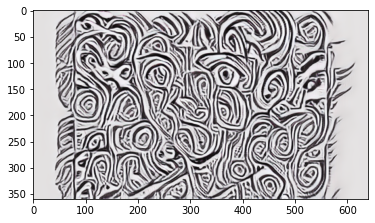

In [19]:
import matplotlib.pyplot as plt
plt.imshow(buf[800])

In [21]:
!ffmpeg -i output.mp4 -i audio.mp3 -c:v copy -c:a aac result.mp4

ffmpeg version 2021-10-24-git-9df3f147f5-full_build-www.gyan.dev Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.2.0 (Rev1, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libdav1d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --e